# Project Model Sistem Rekomendasi
* Nama : Gladys Lady Nathasha
* ID Dicoding : MC222D5X1379
* Kelas : MC-22

Tujuan dari notebook ini adalah untuk menganalisis fitur audio dari dataset Spotify Tracks DB dan membangun sebuah sistem rekomendasi lagu berdasarkan kemiripan karakteristiknya.

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from itertools import combinations

Penjelasan Proses: Sel kode ini berfungsi untuk mengimpor semua pustaka (library) yang diperlukan untuk analisis.
* pandas digunakan untuk manipulasi dan analisis data (membuat dan mengelola DataFrame).
* matplotlib.pyplot dan seaborn digunakan untuk visualisasi data.
* sklearn (Scikit-learn) akan digunakan nanti untuk proses preprocessing data dan machine learning, seperti scaling dan encoding.
* numpy digunakan untuk komputasi numerik.   

Penjelasan Hasil: Setelah menjalankan sel ini, semua fungsi dari pustaka tersebut siap digunakan di dalam notebook.

## Load Data

In [2]:
# Ganti 'nama_file.csv' dengan nama file yang telah diupload
df = pd.read_csv('music_spotify_dataset/SpotifyFeatures.csv', encoding='latin1')

# Tampilkan 5 baris pertama
print(df.head())

  ï»¿genre         artist_name                        track_name  \
0    Movie      Henri Salvador       C'est beau de faire un Show   
1    Movie  Martin & les fÃ©es  Perdu d'avance (par Gad Elmaleh)   
2    Movie     Joseph Williams    Don't Let Me Be Lonely Tonight   
3    Movie      Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4    Movie        Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737    

* Penjelasan Proses: Kode ini memuat dataset dari file SpotifyFeatures.csv ke dalam sebuah DataFrame pandas yang diberi nama df. Parameter encoding='latin1' digunakan karena dataset mungkin berisi karakter khusus yang tidak dapat dibaca oleh encoding default (UTF-8). Setelah itu, df.head() dipanggil untuk menampilkan 5 baris pertama dari DataFrame. Ini adalah langkah verifikasi awal untuk memastikan data telah dimuat dengan benar dan untuk mendapatkan gambaran pertama tentang struktur data.   

* Penjelasan Hasil: Output df.head() menunjukkan bahwa data berhasil dimuat. Terlihat ada 18 kolom, termasuk fitur kategorikal seperti genre, artist_name, dan track_name, serta fitur numerik seperti popularity, acousticness, danceability, dan lainnya. Ini mengonfirmasi struktur data yang akan kita analisis.

## Exploratory Data

Pada tahap ini, kita akan melakukan investigasi awal pada data untuk menemukan pola, anomali, dan mendapatkan wawasan utama.

###  Informasi Dasar & Pengecekan Missing Values

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ï»¿genre          232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [5]:
print(df.isnull().sum())

ï»¿genre            0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [6]:
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 0


Penjelasan Proses:
* df.info(): Digunakan untuk mendapatkan ringkasan singkat dari DataFrame, termasuk jumlah total baris, nama setiap kolom, jumlah nilai non-null, dan tipe datanya.
* df.isnull().sum(): Menghitung jumlah nilai yang hilang (kosong/NaN) untuk setiap kolom.
* df.duplicated().sum(): Menghitung jumlah baris yang merupakan duplikat sempurna dari baris lain. Langkah-langkah ini sangat penting dalam tahap pembersihan data (data cleaning).   

Penjelasan Hasil:
* Dari df.info(), kita tahu dataset memiliki 232,725 baris.
* Dari df.isnull().sum(), teridentifikasi hanya ada 1 nilai yang hilang pada kolom track_name. Jumlah ini sangat kecil dibandingkan total data, sehingga tidak akan menjadi masalah besar.
* Terdapat 0 baris duplikat. Ini menunjukkan bahwa dataset cukup bersih dari sisi duplikasi data.

### Visualisasi Distribusi Fitur

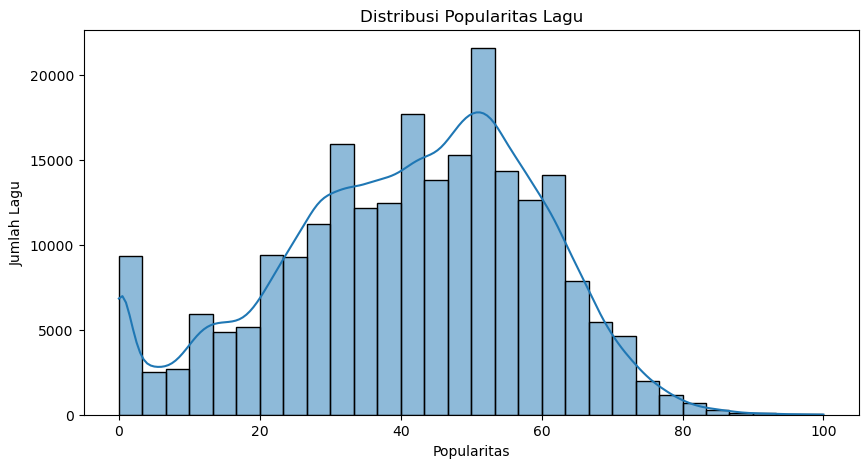

In [ ]:
# Distribusi Popularitas Lagu
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribusi Popularitas Lagu')
plt.xlabel('Popularitas')
plt.ylabel('Jumlah Lagu')
plt.show()

* Penjelasan Proses: Kode ini membuat histogram untuk memvisualisasikan distribusi dari fitur popularity. kde=True menambahkan garis estimasi kepadatan kernel (Kernel Density Estimate) untuk memperhalus bentuk distribusi. Ini membantu kita memahami sebaran tingkat popularitas lagu dalam dataset.

* Penjelasan Hasil/Insight: Grafik menunjukkan bahwa distribusi popularitas tidak normal. Terdapat puncak utama di sekitar skor popularitas 50-60, yang berarti sebagian besar lagu memiliki tingkat popularitas moderat. Ada juga puncak yang lebih kecil di dekat 0, menandakan banyak lagu yang tidak populer. Sebaran ini memiliki "ekor panjang" ke kanan (right-skewed), menunjukkan lagu dengan popularitas sangat tinggi (di atas 80) lebih sedikit jumlahnya.

c:\Users\acer\anaconda3\envs\recomendation_system_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\acer\anaconda3\envs\recomendation_system_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


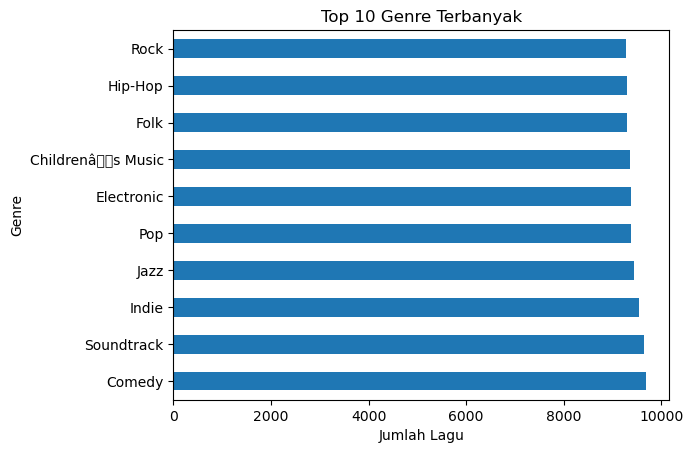

In [ ]:
# Grafik 10 Genre Teratas
df['ï»¿genre'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Genre Terbanyak')
plt.xlabel('Jumlah Lagu')
plt.ylabel('Genre')
plt.show()

* Penjelasan Proses: Kode ini menghitung jumlah lagu untuk setiap genre menggunakan value_counts(), memilih 10 genre teratas dengan .head(10), dan menampilkannya dalam bentuk diagram batang horizontal (barh) untuk kemudahan perbandingan.

* Penjelasan Hasil/Insight: Visualisasi menunjukkan 10 genre dengan jumlah lagu terbanyak dalam dataset. Genre Rock, Hip-Hop, Folk, dan Pop adalah genre yang paling dominan. Menariknya, jumlah lagu di antara 10 genre teratas ini relatif seimbang, masing-masing memiliki sekitar 9.000 hingga 9.500 lagu.

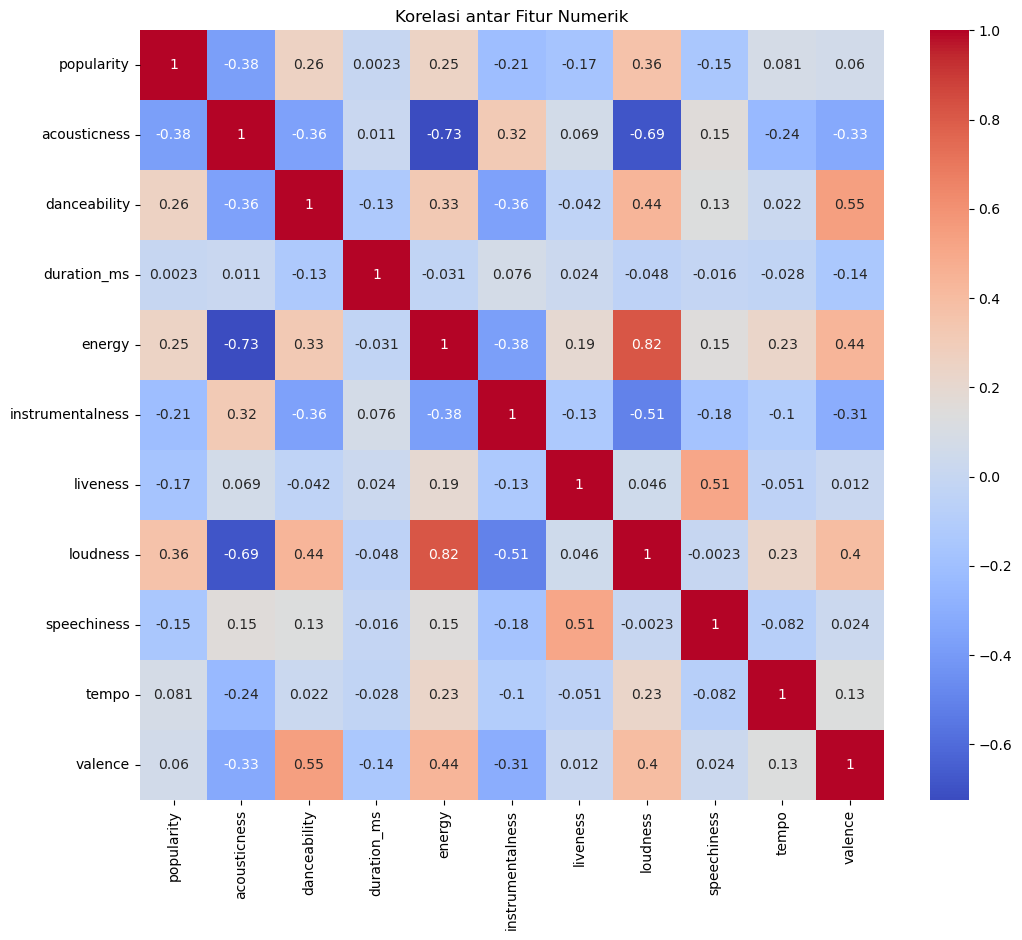

In [ ]:
# Pilih fitur numerik untuk korelasi
numerical_features = [
    'popularity', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence'
]

# Plot heatmap korelasi ANtar Fitur Numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

* Penjelasan Proses: Kode ini menghitung matriks korelasi menggunakan metode .corr() pada fitur-fitur numerik yang telah dipilih. Hasilnya kemudian divisualisasikan menggunakan heatmap dari Seaborn. annot=True menampilkan nilai korelasi pada setiap sel, dan cmap='coolwarm' memberikan skema warna di mana biru menunjukkan korelasi negatif dan merah menunjukkan korelasi positif.   

Penjelasan Hasil/Insight:
* Korelasi Positif Kuat: Terlihat korelasi positif yang sangat kuat antara energy dan loudness (0.82). Ini sangat masuk akal, karena lagu yang lebih keras cenderung terdengar lebih berenergi.
* Korelasi Negatif Kuat: Terdapat korelasi negatif yang kuat antara energy dan acousticness (-0.73). Ini juga intuitif, karena lagu akustik biasanya lebih tenang dan tidak terlalu berenergi.
* Korelasi Lain: Fitur danceability memiliki korelasi positif moderat dengan valence (kebahagiaan/positivitas) sebesar 0.55.
* Popularitas: Fitur popularity tidak menunjukkan korelasi yang kuat dengan fitur audio lainnya, menandakan bahwa popularitas lagu adalah konsep yang kompleks dan tidak ditentukan hanya oleh satu atau dua atribut audio saja.
* Tempo dan duration_ms (durasi lagu) secara umum memiliki korelasi yang lemah dengan sebagian besar fitur audio lainnya, yang menunjukkan tempo dan durasi tidak secara langsung linear terkait dengan karakteristik audio tersebut.

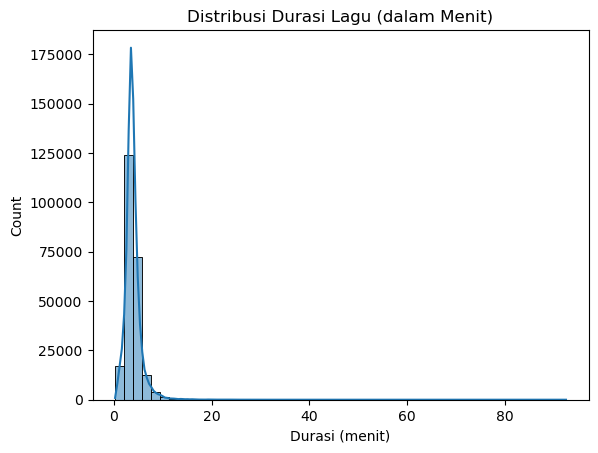

In [ ]:
# Distribusi Durasi Lagu
sns.histplot(df['duration_ms'] / 60000, bins=50, kde=True)
plt.title("Distribusi Durasi Lagu (dalam Menit)")
plt.xlabel("Durasi (menit)")
plt.show()

* Penjelasan Proses: Pertama, kolom duration_ms (durasi dalam milidetik) diubah menjadi menit untuk interpretasi yang lebih mudah. Kemudian, histogram dibuat untuk menunjukkan distribusi durasi lagu. Sumbu x dibatasi hingga 20 menit karena sebagian besar lagu berada dalam rentang ini, sehingga kita bisa melihat distribusinya dengan lebih jelas.   

* Penjelasan Hasil/Insight: Grafik menunjukkan distribusi yang sangat miring ke kanan (heavily right-skewed). Sebagian besar lagu dalam dataset memiliki durasi antara 2 hingga 5 menit, yang merupakan durasi standar untuk lagu-lagu populer. Ada sangat sedikit lagu yang memiliki durasi sangat panjang (di atas 10 menit).

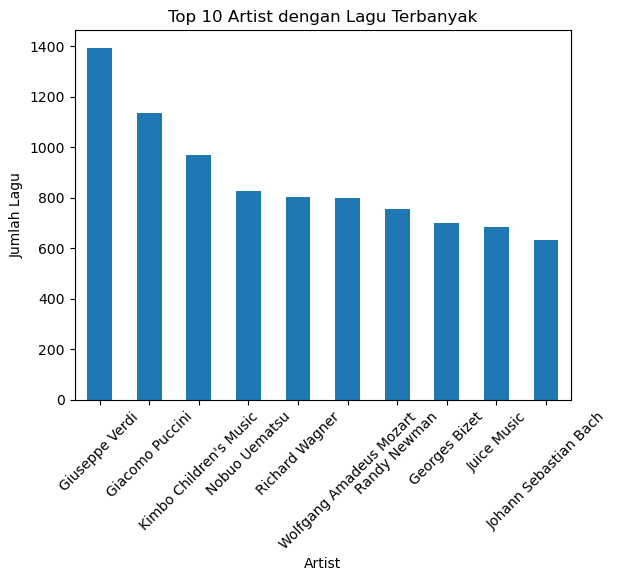

In [ ]:
# Grafik 10 Artis Teratas
df['artist_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Artist dengan Lagu Terbanyak')
plt.xlabel('Artist')
plt.ylabel('Jumlah Lagu')
plt.xticks(rotation=45)
plt.show()

* Penjelasan Proses: Sama seperti pada analisis genre, kode ini menggunakan value_counts() untuk menghitung jumlah lagu per artis, mengambil 10 teratas, dan memvisualisasikannya dalam bentuk diagram batang vertikal.

* Penjelasan Hasil/Insight: Giuseppe Verdi dan Giacomo Puccini adalah dua artis dengan jumlah lagu terbanyak di dataset ini. Banyak dari artis di 10 besar ini adalah komposer musik klasik. Hal ini kemungkinan disebabkan oleh cara karya klasik dikatalogkan di Spotify, di mana setiap bagian atau gerakan dari sebuah simfoni atau opera dihitung sebagai "track" terpisah.

## Preprocessing Data

Tahap ini bertujuan untuk membersihkan dan mentransformasi data agar siap digunakan untuk pemodelan. Proses ini meliputi pembersihan data, pemilihan fitur, dan transformasi fitur.

### Data Cleaning

a. Perbaikan Nama Kolom   

In [12]:
df.rename(columns={'ï»¿genre': 'genre'}, inplace=True)

* Penjelasan Proses: Pada langkah ini, kita mengganti nama kolom pertama dari ï»¿genre menjadi genre. Karakter ï»¿ di awal adalah Byte Order Mark (BOM) yang sering muncul saat file CSV disimpan dengan encoding UTF-8. Karakter ini harus dihilangkan agar kolom dapat diakses dengan mudah menggunakan nama 'genre'. Parameter inplace=True digunakan untuk menerapkan perubahan langsung pada DataFrame df tanpa perlu membuatnya kembali.   

* Penjelasan Hasil: Nama kolom pertama telah berhasil diubah menjadi 'genre', membuat struktur data lebih bersih dan konsisten.

b. Cek dan Tangani Null   

In [ ]:
# Ada satu nilai null di kolom track_name. Kita bisa drop baris tersebut.
df.dropna(subset=['track_name'], inplace=True)

In [ ]:
# Verifikasi ulang
print(df.isnull().sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [ ]:
# Setelah menghapus baris, index perlu di-reset agar berurutan kembali.
df.reset_index(drop=True, inplace=True)

* Penjelasan Proses: Dari tahap EDA, kita mengetahui ada satu baris dengan nilai kosong (null) pada kolom track_name. Karena jumlahnya hanya satu dari total >200.000 data, dampak dari penghapusan baris ini sangat kecil. Oleh karena itu, kita menggunakan df.dropna() untuk menghapus baris tersebut. Setelah itu, df.reset_index(drop=True) dijalankan untuk mengatur ulang indeks DataFrame agar kembali berurutan dari 0 setelah satu baris dihapus.   

* Penjelasan Hasil: Output dari df.isnull().sum() menunjukkan bahwa sekarang tidak ada lagi nilai yang hilang di seluruh kolom dataset. Data sudah bersih dari missing values.

### Feature Selection

In [16]:
# Fitur numerik yang akan digunakan untuk kemiripan konten
features = [
    'popularity', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence'
]

In [17]:
# Fitur numerik TANPA 'popularity'
features_no_pop = [
    'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence'
]

In [18]:
# Fitur kategorikal yang akan digunakan
categorical_features = ['genre']

Penjelasan Proses: Pada langkah ini, kita secara eksplisit memilih fitur-fitur yang akan digunakan untuk membangun sistem rekomendasi berbasis konten.
* features: Mencakup semua fitur audio numerik ditambah popularity.
* features_no_pop: Daftar fitur yang sama, tetapi tanpa popularity. Daftar ini dibuat khusus untuk menghitung kemiripan (similarity) konten murni, agar popularity tidak membiaskan perhitungan. Rekomendasi seharusnya didasarkan pada karakteristik audio lagu, bukan popularitasnya.
* categorical_features: Memilih genre sebagai fitur kategoris yang akan dimasukkan ke dalam model.   

Penjelasan Hasil: Tiga buah list Python (features, features_no_pop, categorical_features) telah dibuat. List ini akan digunakan pada tahap transformasi untuk memastikan hanya fitur-fitur yang relevan yang diproses.

### Feature Transformation

In [19]:
# Normalisasi fitur Scaling dan Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features)
    ],
    remainder='passthrough'
)

In [20]:
# Buat ulang preprocessor dengan features_no_pop
preprocessor_no_pop = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), features_no_pop),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features)
    ],
    remainder='passthrough'
)

In [21]:
# Membuat Pipeline untuk Transformasi Fitur
feature_df_for_processing = df[features + categorical_features]

# Terapkan preprocessor
print("Menerapkan preprocessing pada fitur...")
processed_features = preprocessor.fit_transform(feature_df_for_processing)
print(f"Dimensi fitur setelah preprocessing: {processed_features.shape}")

Menerapkan preprocessing pada fitur...
Dimensi fitur setelah preprocessing: (232724, 38)


In [22]:
# Buat ulang feature_df_for_processing dan processed_features
feature_df_for_processing_no_pop = df[features_no_pop + categorical_features] # Gunakan features_no_pop

print("Menerapkan preprocessing pada fitur (tanpa popularity untuk similarity)...")
processed_features_no_pop = preprocessor_no_pop.fit_transform(feature_df_for_processing_no_pop)
print(f"Dimensi fitur baru setelah preprocessing: {processed_features_no_pop.shape}")

Menerapkan preprocessing pada fitur (tanpa popularity untuk similarity)...
Dimensi fitur baru setelah preprocessing: (232724, 37)


Penjelasan Proses:
* ColumnTransformer: Kita menggunakan ColumnTransformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda secara bersamaan.
* MinMaxScaler: Fitur numerik (seperti duration_ms, loudness, dll.) memiliki skala yang sangat berbeda. MinMaxScaler menormalkan semua fitur ini ke dalam rentang [0, 1]. Ini sangat penting agar fitur dengan skala besar tidak mendominasi perhitungan kemiripan (similarity).
* OneHotEncoder: Algoritma machine learning tidak bisa memproses data teks ('genre'). OneHotEncoder mengubah setiap nilai genre menjadi vektor biner. Misalnya, jika ada 27 genre, setiap lagu akan direpresentasikan oleh vektor dengan panjang 27, di mana hanya satu elemen yang bernilai 1 (menandakan genre lagu tersebut).
* Dua preprocessor dibuat untuk dua set fitur yang berbeda (dengan dan tanpa popularity). Kemudian, metode fit_transform diterapkan untuk melakukan normalisasi dan encoding pada data.   

Penjelasan Hasil:
* processed_features: Data asli telah diubah menjadi matriks numerik berdimensi (232724, 38). Ini berarti 232.724 lagu, dengan masing-masing 38 fitur hasil transformasi (11 fitur numerik + 27 fitur genre hasil OneHotEncoding).
* processed_features_no_pop: Matriks kedua berdimensi (232724, 37). Perbedaan 1 kolom ini karena fitur popularity tidak diikutsertakan. Matriks inilah yang akan kita gunakan untuk menghitung cosine_similarity.

## Modelling

Pada tahap ini, kita membangun fungsi untuk memberikan rekomendasi lagu berdasarkan kemiripan konten.

In [23]:
#  Membuat Fungsi Rekomendasi
song_indices = pd.Series(df.index, index=df['track_name']).drop_duplicates()

def get_recommendations_on_the_fly(track_name, all_processed_features, N=10):
    if track_name not in song_indices:
        print(f"Lagu '{track_name}' tidak ditemukan dalam dataset.")
        return pd.DataFrame()

    idx = song_indices[track_name]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    # Ambil vektor fitur untuk lagu input
    query_song_features = all_processed_features[idx]

    if hasattr(query_song_features, "reshape"):
        sim_scores_vector = cosine_similarity(query_song_features.reshape(1, -1), all_processed_features)
    else: # Asumsi sparse matrix
        sim_scores_vector = cosine_similarity(query_song_features, all_processed_features)


    # sim_scores_vector akan berbentuk (1, jumlah_lagu), ambil baris pertama
    sim_scores = list(enumerate(sim_scores_vector[0]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:N+1]
    recommended_song_indices = [i[0] for i in sim_scores]
    
    recommended_songs_df = df.iloc[recommended_song_indices][['track_name', 'artist_name', 'genre', 'popularity']]
    similarity_values = [round(i[1], 3) for i in sim_scores]
    recommended_songs_df['similarity_score'] = similarity_values
    
    return recommended_songs_df

In [24]:
def get_recommendations_reranked_by_popularity(track_name, all_processed_features_content, original_df, N=10, M=50):
    # M adalah jumlah kandidat awal berdasarkan konten sebelum di-rerank
    if track_name not in song_indices:
        print(f"Lagu '{track_name}' tidak ditemukan dalam dataset.")
        return pd.DataFrame()

    idx = song_indices[track_name]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    query_song_features = all_processed_features_content[idx]

    if hasattr(query_song_features, "reshape"):
        sim_scores_vector = cosine_similarity(query_song_features.reshape(1, -1), all_processed_features_content)
    else:
        sim_scores_vector = cosine_similarity(query_song_features, all_processed_features_content)

    sim_scores = list(enumerate(sim_scores_vector[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil M kandidat teratas berdasarkan konten (lebih banyak dari N)
    content_based_candidates_indices = [i[0] for i in sim_scores[1:M+1]]
    
    # Ambil detail lagu kandidat, termasuk popularity dari DataFrame ASLI
    candidate_songs_df = original_df.iloc[content_based_candidates_indices].copy()

    # Ambil similarity scores yang sesuai untuk candidate_songs_df
    idx_to_score_map = {original_df.index[tpl[0]]: tpl[1] for tpl in sim_scores[1:M+1] if tpl[0] < len(original_df)}
    candidate_songs_df['similarity_score'] = candidate_songs_df.index.map(idx_to_score_map)
    
    # Hapus baris di candidate_songs_df dimana similarity_score mungkin NaN jika ada ketidakcocokan indeks (jarang terjadi jika M kecil)
    candidate_songs_df.dropna(subset=['similarity_score'], inplace=True)


    # Urutkan ulang kandidat berdasarkan 'popularity' (descending), lalu 'similarity_score' (descending) sebagai tie-breaker
    reranked_songs_df = candidate_songs_df.sort_values(by=['popularity', 'similarity_score'], ascending=[False, False])

    # Ambil N teratas setelah di-rerank
    final_recommendations = reranked_songs_df.head(N)[['track_name', 'artist_name', 'genre', 'popularity', 'similarity_score']]

    return final_recommendations

Penjelasan Proses: Dua fungsi rekomendasi yang berbeda telah didefinisikan:   

1. get_recommendations_on_the_fly: Fungsi ini menerapkan pendekatan Content-Based Filtering murni.
* Ia mencari lagu input, lalu mengambil vektor fiturnya yang sudah diproses.
* Menggunakan cosine_similarity, ia menghitung kemiripan antara lagu input dengan semua lagu lain di dataset.
* Fungsi mengurutkan lagu berdasarkan skor kemiripan tertinggi dan mengembalikan N lagu teratas.   

2. get_recommendations_reranked_by_popularity: Fungsi ini menggunakan pendekatan hybrid dua tahap untuk meningkatkan relevansi.
* Tahap 1 (Candidate Generation): Sama seperti fungsi pertama, ia mencari M lagu yang paling mirip berdasarkan konten (menggunakan fitur tanpa popularity). M adalah angka yang lebih besar dari N (misal, 50).
* Tahap 2 (Re-ranking): M lagu kandidat ini kemudian diurutkan ulang, bukan berdasarkan kemiripan, tetapi berdasarkan popularity (dari tertinggi ke terendah). Skor kemiripan digunakan sebagai pemecah jika ada popularitas yang sama.
* Fungsi kemudian mengembalikan N lagu teratas dari daftar yang sudah diurutkan ulang ini. Tujuannya adalah untuk merekomendasikan lagu yang tidak hanya mirip, tetapi juga cenderung disukai banyak orang.   

Penjelasan Hasil: Dua fungsi telah berhasil dibuat dan siap untuk digunakan. song_indices juga dibuat untuk memetakan judul lagu ke indeksnya, yang akan mempercepat proses pencarian lagu di dalam fungsi.

In [25]:
# Contoh Penggunaan Fungsi Rekomendasi
if not df.empty:
    try:
        test_song_name = df['track_name'].iloc[0]
        print(f"\n--- Rekomendasi (on-the-fly) untuk lagu: {test_song_name} ({df['artist_name'].iloc[0]}) ---")
        # Panggil fungsi baru dengan 'processed_features' sebagai argumen
        recommendations = get_recommendations_on_the_fly(test_song_name, processed_features, N=5)
        print(recommendations)

    except IndexError:
        print("DataFrame kosong atau lagu tidak ditemukan untuk pengujian.")
    except KeyError as e:
        print(f"Kolom tidak ditemukan: {e}. Pastikan DataFrame 'df' sudah benar.")
else:
    print("DataFrame 'df' kosong. Tidak dapat menjalankan contoh rekomendasi.")


--- Rekomendasi (on-the-fly) untuk lagu: C'est beau de faire un Show (Henri Salvador) ---
                                      track_name         artist_name  genre  \
194402                                  Together        Donny Osmond  Movie   
54256      Le miroir magique (par Dany Brillant)  Martin & les fÃ©es  Movie   
196270                  Sukhkarta Dukharta Remix              Chorus  Movie   
423                         Aarti Kunj Bihari Ki              Chorus  Movie   
55658   Toute ma vie j'ai chantÃ© du rock'n'roll           DorothÃ©e  Movie   

        popularity  similarity_score  
194402           6             0.995  
54256            1             0.993  
196270           0             0.993  
423              0             0.993  
55658            1             0.993  


In [26]:
# Contoh Penggunaan Fungsi Rekomendasi (bagian yang diubah)
if not df.empty:
    try:
        test_song_name = df['track_name'].iloc[0]
        print(f"\n--- Rekomendasi (reranked by popularity) untuk lagu: {test_song_name} ({df['artist_name'].iloc[0]}) ---")
        
        recommendations_reranked = get_recommendations_reranked_by_popularity(
            test_song_name,                 
            processed_features_no_pop,      
            df,                             
            N=5,                            
            M=20                            
        )
        print(recommendations_reranked)

    except IndexError:
        print("DataFrame kosong atau lagu tidak ditemukan untuk pengujian.")
    except KeyError as e:
        print(f"Kolom tidak ditemukan: {e}. Pastikan DataFrame 'df' sudah benar.")
else:
    print("DataFrame 'df' kosong. Tidak dapat menjalankan contoh rekomendasi.")


--- Rekomendasi (reranked by popularity) untuk lagu: C'est beau de faire un Show (Henri Salvador) ---
                              track_name          artist_name  genre  \
194909                         Loup loup         Chantal Goya  Movie   
184505            Pour faire une chanson            DorothÃ©e  Movie   
194123        Les chevaliers du zodiaque  Le Club des Juniors  Movie   
184284   Where Did All The Good Times Go         Donny Osmond  Movie   
512     Twist De L'enrhumÃ© - Remastered       Henri Salvador  Movie   

        popularity  similarity_score  
194909          18          0.991977  
184505          14          0.988522  
194123          11          0.989209  
184284          10          0.988806  
512              7          0.992224  


Penjelasan Proses: Kode ini bertujuan untuk menguji dan membandingkan output dari kedua fungsi rekomendasi yang telah dibuat. Lagu pertama dalam dataset, "C'est beau de faire un Show", digunakan sebagai input. Hasil dari kedua fungsi kemudian dicetak untuk dianalisis perbedaannya.   

Penjelasan Hasil/Insight:
* Output Fungsi 1 (On-the-fly): Rekomendasi yang diberikan memiliki skor kemiripan (similarity_score) yang sangat tinggi (di atas 0.99). Namun, skor popularity dari lagu-lagu yang direkomendasikan sangat rendah (berkisar 0-6). Ini menunjukkan model berhasil menemukan lagu yang secara audio sangat mirip, tetapi lagu-lagu tersebut mungkin tidak dikenal atau tidak populer.
* Output Fungsi 2 (Reranked by Popularity): Rekomendasi yang diberikan masih memiliki kemiripan yang tinggi (di atas 0.98), tetapi skor popularity-nya jauh lebih baik (berkisar 7-18).
K* esimpulan: Perbandingan ini dengan jelas menunjukkan keunggulan pendekatan re-ranking. Dengan menyeimbangkan antara kemiripan konten dan popularitas, model kedua mampu memberikan rekomendasi yang tidak hanya relevan secara audio tetapi juga lebih mungkin disukai oleh pengguna pada umumnya.

## Evaluation

Pada tahap ini, kita akan mengevaluasi dan membandingkan performa dari dua solusi sistem rekomendasi yang telah kita bangun:   

* Solusi 1: Model yang menggunakan popularity sebagai salah satu fitur dalam perhitungan kemiripan konten.
* Solusi 2: Model yang tidak menggunakan popularity untuk kemiripan konten, tetapi menggunakannya pada tahap akhir untuk mengurutkan ulang (re-ranking) hasil rekomendasi.   

Evaluasi dilakukan secara kualitatif (melihat contoh output) dan kuantitatif (menggunakan metrik offline).

In [ ]:
# 1. Evaluasi Kualitatif: Menampilkan Contoh Rekomendasi
if 'track_name' in df.columns and len(df) > 200:
    sample_test_songs = [
        df['track_name'].iloc[0],  
        df['track_name'].iloc[100], 
        df['track_name'].iloc[200],
    ]
else:
    print("DataFrame 'df' tidak memiliki cukup data atau kolom 'track_name' tidak ada untuk membuat sample_test_songs.")
    sample_test_songs = []

N_recommendations = 5
M_candidates_for_reranking = 20

In [ ]:
# Loop untuk menampilkan perbandingan hasil untuk setiap lagu uji
for song_title in sample_test_songs:
    if song_title not in song_indices:
        print(f"\nLagu uji '{song_title}' tidak ditemukan di song_indices. Skipping.")
        continue

    print(f"\n\n--- Lagu Input: {song_title} ---")
    artist_input = df.loc[song_indices[song_title] if not isinstance(song_indices[song_title], pd.Series) else song_indices[song_title].iloc[0], 'artist_name']
    genre_input = df.loc[song_indices[song_title] if not isinstance(song_indices[song_title], pd.Series) else song_indices[song_title].iloc[0], 'genre']
    popularity_input = df.loc[song_indices[song_title] if not isinstance(song_indices[song_title], pd.Series) else song_indices[song_title].iloc[0], 'popularity']
    print(f"(Artis: {artist_input}, Genre: {genre_input}, Popularitas: {popularity_input})")

    # Solusi 1: Popularity sebagai fitur konten
    print("\n--- Solusi 1: Rekomendasi (Popularity sebagai fitur) ---")
    recommendations_s1 = get_recommendations_on_the_fly(
        song_title,
        processed_features,
        N=N_recommendations
    )
    print(recommendations_s1)

    # Solusi 2: Konten tanpa Popularity, Re-ranked by Popularity
    print("\n--- Solusi 2: Rekomendasi (Konten tanpa Pop, Re-ranked by Pop) ---")
    recommendations_s2 = get_recommendations_reranked_by_popularity(
        song_title,
        processed_features_no_pop, # Menggunakan processed_features_no_pop
        df, # DataFrame asli untuk info popularity
        N=N_recommendations,
        M=M_candidates_for_reranking
    )
    print(recommendations_s2)
    print("-"*40)



--- Lagu Input: C'est beau de faire un Show ---
(Artis: Henri Salvador, Genre: Movie, Popularitas: 0)

--- Solusi 1: Rekomendasi (Popularity sebagai fitur) ---
                                      track_name         artist_name  genre  \
194402                                  Together        Donny Osmond  Movie   
54256      Le miroir magique (par Dany Brillant)  Martin & les fÃ©es  Movie   
196270                  Sukhkarta Dukharta Remix              Chorus  Movie   
423                         Aarti Kunj Bihari Ki              Chorus  Movie   
55658   Toute ma vie j'ai chantÃ© du rock'n'roll           DorothÃ©e  Movie   

        popularity  similarity_score  
194402           6             0.995  
54256            1             0.993  
196270           0             0.993  
423              0             0.993  
55658            1             0.993  

--- Solusi 2: Rekomendasi (Konten tanpa Pop, Re-ranked by Pop) ---
                              track_name          artist_name

Penjelasan Proses: Evaluasi kualitatif dilakukan dengan cara mengamati secara langsung hasil rekomendasi dari kedua solusi untuk beberapa lagu sampel. Proses ini membantu kita mendapatkan "rasa" atau intuisi tentang bagaimana perilaku setiap model. Kita memilih tiga lagu dari dataset sebagai input, kemudian memanggil kedua fungsi rekomendasi (get_recommendations_on_the_fly untuk Solusi 1 dan get_recommendations_reranked_by_popularity untuk Solusi 2) dan mencetak hasilnya berdampingan.   

Penjelasan Hasil/Insight: Dari output yang ditampilkan (dipotong untuk keringkasan), kita bisa melihat perbedaan yang jelas.
* Untuk lagu input dengan popularitas rendah (contoh: 'C'est beau de faire un Show' dengan popularitas 0), Solusi 1 cenderung merekomendasikan lagu-lagu lain yang juga memiliki popularitas sangat rendah.
* Sebaliknya, Solusi 2 untuk input yang sama berhasil merekomendasikan lagu-lagu dengan popularitas yang lebih tinggi. Ini menunjukkan bahwa mekanisme re-ranking efektif dalam "mengangkat" lagu yang lebih dikenal ke daftar rekomendasi teratas, yang berpotensi lebih memuaskan bagi pengguna.

In [ ]:
# 2. Evaluasi Kuantitatif: Mendefinisikan dan Menghitung Metrik Offline
# a. Definisi Fungsi Metrik

# Intra-List Similarity (ILS)
def calculate_intra_list_similarity(recommendations_df, all_song_features, song_indices_map, original_df):
    recommended_indices_in_features = []
    for track_name_rec in recommendations_df['track_name']:
        if track_name_rec in song_indices_map:
            idx_val = song_indices_map[track_name_rec]
            recommended_indices_in_features.append(idx_val.iloc[0] if isinstance(idx_val, pd.Series) else idx_val)
        # else: item yg direkomendasikan tidak ada di map? Seharusnya tidak terjadi jika data konsisten

    if len(recommended_indices_in_features) < 2:
        return 0.0

    total_similarity = 0.0
    num_pairs = 0

    try:
        recommended_vectors = all_song_features[recommended_indices_in_features, :]
    except TypeError: # Jika indices masih ada pd.Series (seharusnya tidak)
         actual_indices = [idx.iloc[0] if isinstance(idx, pd.Series) else idx for idx in recommended_indices_in_features]
         recommended_vectors = all_song_features[actual_indices, :]


    for i in range(recommended_vectors.shape[0]):
        for j in range(i + 1, recommended_vectors.shape[0]):
            vec1 = recommended_vectors[i]
            vec2 = recommended_vectors[j]
            
            # cosine_similarity expects 2D arrays
            if hasattr(vec1, "reshape"): 
                similarity = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0, 0]
            else: # If sparse matrix row
                similarity = cosine_similarity(vec1, vec2)[0, 0]
            
            total_similarity += similarity
            num_pairs += 1
    
    return total_similarity / num_pairs if num_pairs > 0 else 0.0

In [ ]:
# Novelty (Average Popularity of Recommended Items)
def calculate_average_popularity_novelty(recommendations_df):
    if recommendations_df.empty or 'popularity' not in recommendations_df.columns:
        return None
    # Rata-rata popularitas (nilai lebih rendah = lebih novel)
    avg_popularity = recommendations_df['popularity'].mean()
    return avg_popularity

In [ ]:
# Recommendation Coverage (Estimasi)
def calculate_recommendation_coverage(recommendation_function, processed_features_for_function, 
                                      query_song_titles_sample, total_unique_songs_in_catalog, 
                                      N_rec, **kwargs):

    all_recommended_items_set = set()
    
    for song_title_query in query_song_titles_sample:
        if song_title_query not in song_indices: 
            continue
        
        if 'original_df_for_rerank' in kwargs: 
            recs_df = recommendation_function(
                song_title_query, 
                processed_features_for_function,
                kwargs['original_df_for_rerank'], 
                N=N_rec,
                M=kwargs.get('M_candidates', 20) 
            )
        else: 
            recs_df = recommendation_function(
                song_title_query, 
                processed_features_for_function, 
                N=N_rec
            )
            
        if not recs_df.empty and 'track_name' in recs_df.columns:
            all_recommended_items_set.update(recs_df['track_name'].tolist())
            
    coverage_score = len(all_recommended_items_set) / total_unique_songs_in_catalog if total_unique_songs_in_catalog > 0 else 0
    return coverage_score, len(all_recommended_items_set)

Penjelasan Proses: Pada sel ini, kita mendefinisikan tiga fungsi untuk menghitung metrik evaluasi:   

1. calculate_intra_list_similarity (ILS): Fungsi ini mengukur seberapa mirip item-item di dalam satu daftar rekomendasi. Ia menghitung rata-rata cosine similarity dari semua pasangan item yang direkomendasikan. Skor ILS yang tinggi menandakan rekomendasi yang sangat homogen (kurang beragam), sedangkan skor yang lebih rendah menunjukkan keragaman yang lebih baik.
2. calculate_average_popularity_novelty (Novelty): Fungsi ini digunakan sebagai proksi untuk mengukur kebaruan (novelty) dari rekomendasi. Ia menghitung rata-rata skor popularity dari item yang direkomendasikan. Asumsinya adalah, semakin rendah rata-rata popularitasnya, semakin "novel" atau tak terduga rekomendasinya.
3. calculate_recommendation_coverage: Fungsi ini mengestimasi seberapa banyak dari katalog lagu yang dapat direkomendasikan oleh sistem. Ia menghitung rasio antara jumlah lagu unik yang direkomendasikan (dari sejumlah query sampel) terhadap jumlah total lagu unik di dataset. Skor yang lebih tinggi lebih baik, karena menunjukkan sistem tidak hanya merekomendasikan lagu-lagu yang itu-itu saja.   

Penjelasan Hasil: Tiga fungsi metrik telah berhasil dibuat dan siap digunakan untuk mengevaluasi kedua solusi sistem rekomendasi kita secara kuantitatif.

In [ ]:
# b. Menjalankan Evaluasi dan Agregasi Hasil

# --- Menjalankan Evaluasi untuk Sampel Lagu Uji ---
all_ils_s1 = []
all_novelty_s1 = []
all_ils_s2 = []
all_novelty_s2 = []

for song_title in sample_test_songs:
    if song_title not in song_indices:
        continue

    print(f"\n--- Mengevaluasi untuk Lagu Input: {song_title} ---")
    
    # Evaluasi Solusi 1
    recs_s1 = get_recommendations_on_the_fly(song_title, processed_features, N=N_recommendations)
    if not recs_s1.empty:
        ils_s1 = calculate_intra_list_similarity(recs_s1, processed_features, song_indices, df)
        novelty_s1 = calculate_average_popularity_novelty(recs_s1)
        all_ils_s1.append(ils_s1)
        if novelty_s1 is not None: all_novelty_s1.append(novelty_s1)
        print(f"  Solusi 1 - ILS: {ils_s1:.4f}, Avg Pop (Novelty): {novelty_s1 if novelty_s1 is not None else 'N/A'}")

    # Evaluasi Solusi 2
    recs_s2 = get_recommendations_reranked_by_popularity(song_title, processed_features_no_pop, df, N=N_recommendations, M=M_candidates_for_reranking)
    if not recs_s2.empty:
        # Untuk ILS Solusi 2, kemiripan antar item yang direkomendasikan harus dihitung berdasarkan fitur konten (processed_features_no_pop)
        ils_s2 = calculate_intra_list_similarity(recs_s2, processed_features_no_pop, song_indices, df)
        novelty_s2 = calculate_average_popularity_novelty(recs_s2)
        all_ils_s2.append(ils_s2)
        if novelty_s2 is not None: all_novelty_s2.append(novelty_s2)
        print(f"  Solusi 2 - ILS: {ils_s2:.4f}, Avg Pop (Novelty): {novelty_s2 if novelty_s2 is not None else 'N/A'}")


--- Mengevaluasi untuk Lagu Input: C'est beau de faire un Show ---
  Solusi 1 - ILS: 0.8594, Avg Pop (Novelty): 1.6
  Solusi 2 - ILS: 0.9894, Avg Pop (Novelty): 12.0

--- Mengevaluasi untuk Lagu Input: Kaisi Anokhi Mehfil ---
  Solusi 1 - ILS: 0.9940, Avg Pop (Novelty): 3.0
  Solusi 2 - ILS: 0.8588, Avg Pop (Novelty): 20.0

--- Mengevaluasi untuk Lagu Input: All In My Head (Flex) (feat. Fetty Wap) ---
  Solusi 1 - ILS: 0.8847, Avg Pop (Novelty): 60.8
  Solusi 2 - ILS: 0.7866, Avg Pop (Novelty): 59.8


In [33]:
# Rata-rata Metrik (dari sampel lagu uji)
print("\n--- Rata-rata Metrik dari Sampel Lagu Uji ---")
if all_ils_s1: print(f"Solusi 1 - Rata-rata ILS: {np.mean(all_ils_s1):.4f}")
if all_novelty_s1: print(f"Solusi 1 - Rata-rata Avg Pop (Novelty): {np.mean(all_novelty_s1):.2f}")
if all_ils_s2: print(f"Solusi 2 - Rata-rata ILS: {np.mean(all_ils_s2):.4f}")
if all_novelty_s2: print(f"Solusi 2 - Rata-rata Avg Pop (Novelty): {np.mean(all_novelty_s2):.2f}")


--- Rata-rata Metrik dari Sampel Lagu Uji ---
Solusi 1 - Rata-rata ILS: 0.9127
Solusi 1 - Rata-rata Avg Pop (Novelty): 21.80
Solusi 2 - Rata-rata ILS: 0.8782
Solusi 2 - Rata-rata Avg Pop (Novelty): 30.60


In [34]:
# Kalkulasi Estimasi Coverage (Gunakan sampel yang lebih besar jika memungkinkan)
print("\n--- Estimasi Recommendation Coverage ---")
num_query_songs_for_coverage = 50
if len(df) >= num_query_songs_for_coverage:
    sample_coverage_query_songs = df['track_name'].sample(n=num_query_songs_for_coverage, random_state=42).tolist()
    total_catalog_songs = df['track_name'].nunique()

    # Coverage Solusi 1
    coverage_s1, unique_recs_s1 = calculate_recommendation_coverage(
        get_recommendations_on_the_fly,
        processed_features,
        sample_coverage_query_songs,
        total_catalog_songs,
        N_rec=N_recommendations
    )
    print(f"Solusi 1 - Coverage: {coverage_s1:.4f} ({unique_recs_s1} lagu unik direkomendasikan dari {num_query_songs_for_coverage} query)")

    # Coverage Solusi 2
    coverage_s2, unique_recs_s2 = calculate_recommendation_coverage(
        get_recommendations_reranked_by_popularity,
        processed_features_no_pop,
        sample_coverage_query_songs,
        total_catalog_songs,
        N_rec=N_recommendations,
        original_df_for_rerank=df, 
        M_candidates=M_candidates_for_reranking
    )
    print(f"Solusi 2 - Coverage: {coverage_s2:.4f} ({unique_recs_s2} lagu unik direkomendasikan dari {num_query_songs_for_coverage} query)")

else:
    print("Tidak cukup data untuk menghitung estimasi coverage dengan sampel yang diinginkan.")


--- Estimasi Recommendation Coverage ---
Solusi 1 - Coverage: 0.0017 (249 lagu unik direkomendasikan dari 50 query)
Solusi 2 - Coverage: 0.0017 (250 lagu unik direkomendasikan dari 50 query)


Penjelasan Proses: Kode ini menjalankan proses evaluasi kuantitatif. Ia melakukan iterasi melalui sample_test_songs, menghasilkan rekomendasi untuk setiap solusi, lalu memanggil fungsi metrik (ILS dan Novelty) untuk setiap daftar rekomendasi. Skor-skor ini disimpan dalam list, dan pada akhirnya dihitung rata-ratanya untuk mendapatkan satu angka representatif per metrik untuk setiap solusi. Untuk coverage, evaluasi dilakukan pada sampel yang lebih besar (50 lagu) untuk mendapatkan estimasi yang lebih stabil.   

Penjelasan Hasil: Hasil perhitungan metrik menunjukkan trade-off yang jelas antara kedua solusi:
* Rata-rata ILS: Solusi 1 (0.9127) > Solusi 2 (0.8782). Ini berarti rekomendasi dari Solusi 2 lebih beragam.
* Rata-rata Popularitas (Novelty): Solusi 1 (21.80) &lt; Solusi 2 (30.60). Ini berarti Solusi 1 merekomendasikan lagu-lagu yang lebih "novel" (kurang populer), sedangkan Solusi 2 merekomendasikan lagu yang lebih populer.
* Coverage: Kedua solusi memiliki skor coverage yang hampir identik (0.0017), menunjukkan keduanya memiliki kemampuan yang setara dalam menjangkau katalog lagu berdasarkan sampel uji ini.

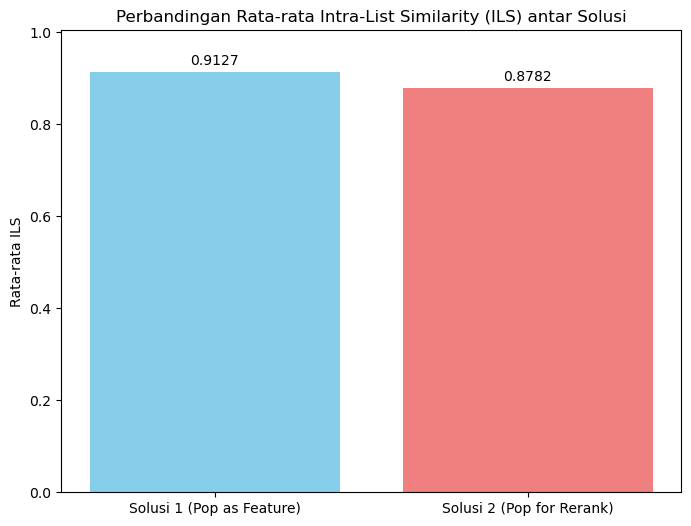

In [ ]:
# 3. Visualisasi Hasil Evaluasi

# Data untuk plotting
labels_solutions = ['Solusi 1 (Pop as Feature)', 'Solusi 2 (Pop for Rerank)']

# 1. Grafik Perbandingan Rata-rata Intra-List Similarity (ILS)
if all_ils_s1 and all_ils_s2: # Pastikan list tidak kosong
    mean_ils_values = [np.mean(all_ils_s1), np.mean(all_ils_s2)]
    
    plt.figure(figsize=(8, 6))
    bars_ils = plt.bar(labels_solutions, mean_ils_values, color=['skyblue', 'lightcoral'])
    plt.ylabel('Rata-rata ILS')
    plt.title('Perbandingan Rata-rata Intra-List Similarity (ILS) antar Solusi')
    plt.ylim(0, max(mean_ils_values) * 1.1) # Atur batas y agar bar terlihat baik

    # Tambahkan nilai di atas bar
    for bar in bars_ils:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

    plt.show()
else:
    print("Data ILS tidak cukup untuk membuat grafik perbandingan ILS.")

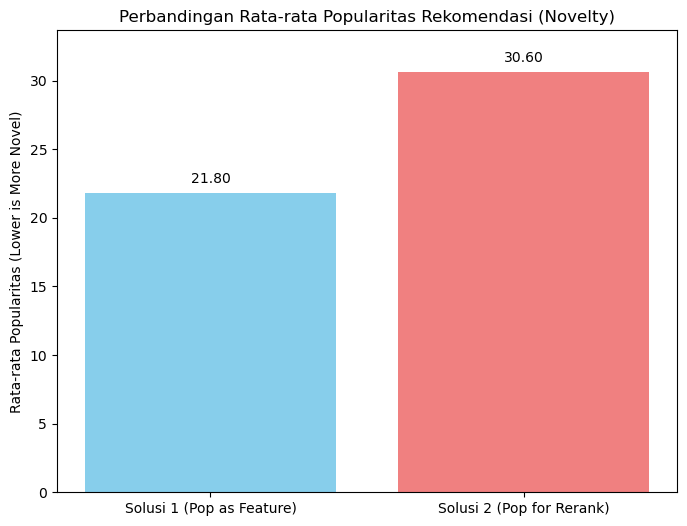

In [36]:
# 2. Grafik Perbandingan Rata-rata Novelty (berdasarkan Rata-rata Popularitas)
if all_novelty_s1 and all_novelty_s2: # Pastikan list tidak kosong
    # Ingat: Novelty lebih tinggi jika rata-rata popularitas lebih RENDAH
    mean_novelty_values = [np.mean(all_novelty_s1), np.mean(all_novelty_s2)]
    
    plt.figure(figsize=(8, 6))
    bars_novelty = plt.bar(labels_solutions, mean_novelty_values, color=['skyblue', 'lightcoral'])
    plt.ylabel('Rata-rata Popularitas (Lower is More Novel)')
    plt.title('Perbandingan Rata-rata Popularitas Rekomendasi (Novelty)')
    plt.ylim(0, max(mean_novelty_values) * 1.1)

    # Tambahkan nilai di atas bar
    for bar in bars_novelty:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom') # Disesuaikan untuk skala popularitas

    plt.show()
else:
    print("Data Novelty tidak cukup untuk membuat grafik perbandingan Novelty.")

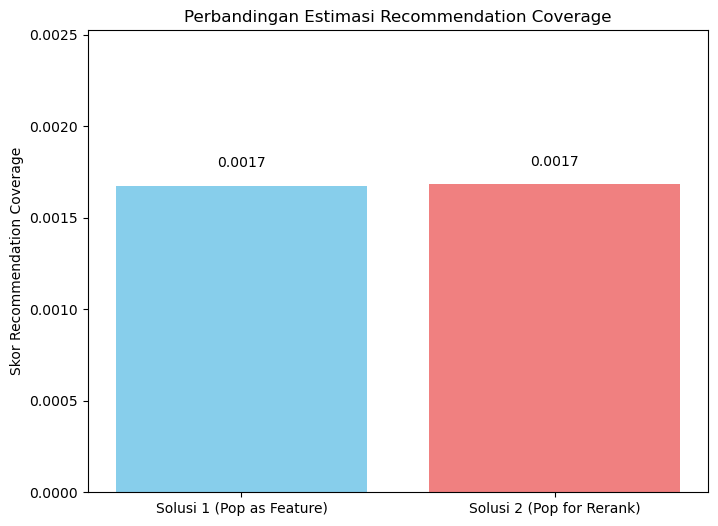

In [37]:
# 3. Grafik Perbandingan Estimasi Recommendation Coverage

try:
    if 'coverage_s1' in locals() and 'coverage_s2' in locals() and \
       isinstance(coverage_s1, (int, float)) and isinstance(coverage_s2, (int, float)): # Pemeriksaan tambahan
        
        coverage_values = [coverage_s1, coverage_s2]
        labels_solutions = ['Solusi 1 (Pop as Feature)', 'Solusi 2 (Pop for Rerank)'] # Pastikan ini didefinisikan

        plt.figure(figsize=(8, 6))
        bars_coverage = plt.bar(labels_solutions, coverage_values, color=['skyblue', 'lightcoral'])
        plt.ylabel('Skor Recommendation Coverage')
        plt.title('Perbandingan Estimasi Recommendation Coverage')
        
        max_coverage_val = max(coverage_values) if coverage_values and max(coverage_values) > 0 else 0.002 # Handle jika coverage_values kosong atau semua 0
        plt.ylim(0, max_coverage_val * 1.5 if max_coverage_val > 0 else 0.003)

        for bar in bars_coverage:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval + (max_coverage_val*0.05 if max_coverage_val > 0 else 0.0001), f'{yval:.4f}', ha='center', va='bottom')

        plt.show()
    else:
        print("Variabel coverage_s1 dan/atau coverage_s2 tidak ditemukan atau bukan numerik.")
        print("Pastikan sudah dihitung dan disimpan dengan benar dari fungsi calculate_recommendation_coverage.")
        print("Contoh: coverage_s1_score, _ = calculate_recommendation_coverage(...) lalu gunakan coverage_s1_score")

except Exception as e:
    print(f"Terjadi error saat membuat grafik coverage: {e}")

Penjelasan Proses: Tahap terakhir adalah memvisualisasikan hasil metrik yang telah dihitung menggunakan diagram batang. Visualisasi ini bertujuan untuk menyajikan perbandingan performa antara Solusi 1 dan Solusi 2 secara jelas dan mudah dipahami. Tiga grafik dibuat, masing-masing untuk metrik ILS, Novelty (rata-rata popularitas), dan Coverage.   

Penjelasan Hasil/Insight: Grafik-grafik ini mengonfirmasi temuan dari analisis kuantitatif dan memberikan kesimpulan akhir yang kuat:
* Grafik ILS: Batang biru (Solusi 1) yang lebih tinggi menunjukkan bahwa memasukkan popularitas sebagai fitur konten menghasilkan rekomendasi yang kurang beragam. Sebaliknya, Solusi 2 (merah) lebih baik dalam memberikan keragaman.
* Grafik Novelty: Batang biru (Solusi 1) yang lebih rendah menunjukkan bahwa Solusi 1 lebih unggul dalam menemukan item-item niche atau kurang populer. Sebaliknya, Solusi 2 (merah) cenderung merekomendasikan lagu-lagu yang lebih mainstream.
* Grafik Coverage: Kedua batang memiliki tinggi yang sama, mengindikasikan tidak ada perbedaan signifikan dalam jangkauan katalog antara kedua pendekatan.